In [1]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear, graph_multiyear, pct_change_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2010, 2015, 2020],
    group="B02001",
    prompt=False,
    state=NY,
    school_district_unified="12510",
)
df

	'Estimate!!Total' in [2010, 2015]
	'Estimate!!Total:' in [2020]
	'Estimate!!Total!!White alone' in [2010, 2015]
	'Estimate!!Total:!!White alone' in [2020]
	'Estimate!!Total!!Black or African American alone' in [2010, 2015]
	'Estimate!!Total:!!Black or African American alone' in [2020]
	'Estimate!!Total!!American Indian and Alaska Native alone' in [2010, 2015]
	'Estimate!!Total:!!American Indian and Alaska Native alone' in [2020]
	'Estimate!!Total!!Asian alone' in [2010, 2015]
	'Estimate!!Total:!!Asian alone' in [2020]
	'Estimate!!Total!!Native Hawaiian and Other Pacific Islander alone' in [2010, 2015]
	'Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone' in [2020]
	'Estimate!!Total!!Some other race alone' in [2010, 2015]
	'Estimate!!Total:!!Some other race alone' in [2020]
	'Estimate!!Total!!Two or more races' in [2010, 2015]
	'Estimate!!Total:!!Two or more races:' in [2020]
	'Estimate!!Total!!Two or more races!!Two races including Some other race' in [2010, 2015]
	'Es

,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",Year
0,43899,36109,1085,6,5513,0,887,299,163,136,2010
0,44975,33688,1292,157,7993,5,858,982,46,936,2015
0,46046,31521,839,126,11271,0,1542,747,153,594,2020


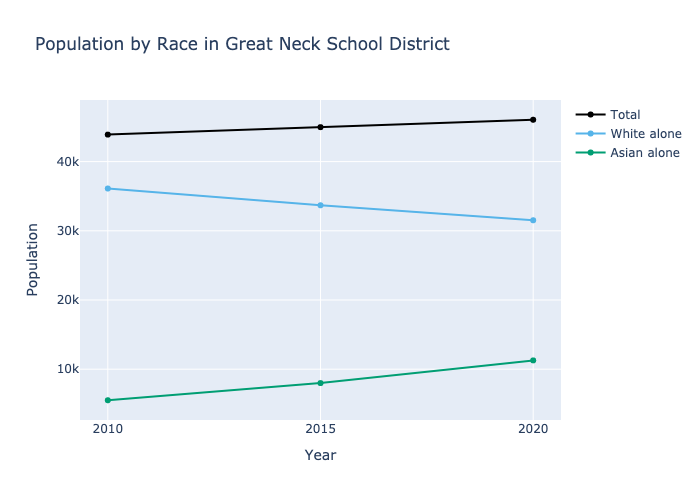

In [2]:
graph_multiyear(
    df=df,
    title="Population by Race in Great Neck School District",
    yaxis_title="Population",
    y_cols=["Total", "White alone", "Asian alone"]
)

   Total  White alone  Black or African American alone  \
0    NaN          NaN                              NaN   
0    2.5         -6.7                             19.1   
0    2.4         -6.4                            -35.1   

   American Indian and Alaska Native alone  Asian alone  \
0                                      NaN          NaN   
0                                   2516.7         45.0   
0                                    -19.7         41.0   

   Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
0                                               NaN                    NaN   
0                                               inf                   -3.3   
0                                            -100.0                   79.7   

   Two or more races  Two races including Some other race  \
0                NaN                                  NaN   
0              228.4                                -71.8   
0              -23.9              

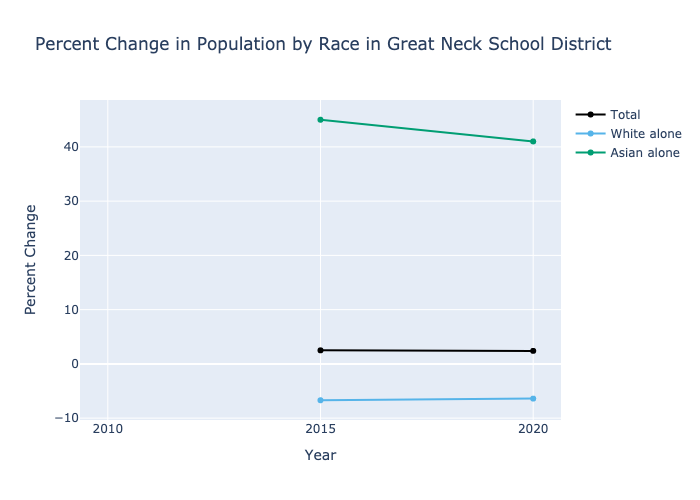

In [3]:
df = pct_change_multiyear(df)
print(df)

graph_multiyear(
    df=df,
    title="Percent Change in Population by Race in Great Neck School District",
    yaxis_title="Percent Change",
    y_cols=["Total", "White alone", "Asian alone"]    
)